**Tarefa 2 - Cálculo Númerico 2022/01**

*Professor:* **Sávio Rodrigues**

*Alunos:* **Jorge Luiz Medeiros Pires (790942)** e **Giullio Emmanuel da Cruz Di Gerolamo (790965)**

Importando as bibliotecas que serão utilizadas durante todas as questões.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# **PROBLEMA 1**


**PROBLEMA 1**

No problema 1, é apresentado o preço de um produto, uma TV Samsung que custa **1,305.00** reais a vista no boleto ou com uma opção de pagamento a prazo que possui uma entrada de **139.65** reais com mais 11 parcelas de **139.56** reais. Assim é pedido que se ache o valor do juros mensal, e anual do pagamento parcelado.

A partir disso, foi criado um função para que depois seja aplicado o método da bisseção. Ou seja, vamos aproximando o valor do zero de função (pela fórmula a seguir) até encontrar o valor que satisfaça a precisão definida.

\begin{align}
  \frac{a+b}{2}
\end{align}


Para determinar o intervalo, plotamos um gráfico. Dessa forma, poderiamos visualizar um intervalo de forma aproximada.

Começamos definindo as variáveis definidas pelo problema.

In [92]:
precoVista1 = 1305
valorParcela1 = 139.56
numeroParcela1 = 11
entrada1 = 139.65

Para definir a função, utilizamos a fórmula:

\begin{align}
  f(juros) =∑ \frac{valorParcela}{(1+juros)^n}
\end{align}

sendo n, o numero de parcelas.

In [93]:
Q = precoVista1 - entrada1 

def f(juros):
  y = 0
  juros=juros/100
  for i in range (1,numeroParcela1+1):
    y = y + valorParcela1/(1+juros)**(i)
  return y - Q

Definimos um gráfico simples, apenas para visualizar um intervalo para ser escolhido para o  método da bisseção.

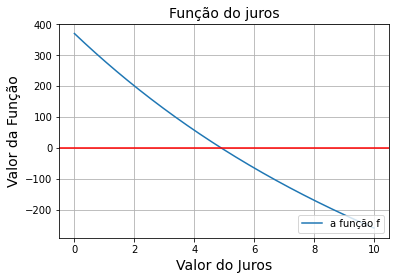

In [94]:
x=np.linspace(0,10,200) 
cm = 1/2.54  
fig, ax = plt.subplots(figsize=(15*cm, 10*cm))
ax.plot(x, f(x), label = 'a função f')    
plt.axhline(y=0, color='r' ) #a linha do zero foi traçada para melhorar a visualização da raiz da função
ax.set_xlabel('Valor do Juros',fontsize=14) 
ax.set_ylabel('Valor da Função',fontsize=14)
ax.set_title('Função do juros',fontsize=14)
ax.legend(loc='lower right')
ax.grid(True)

plt.show()

Decidimos então aproximar o gráfico, reduzindo o intervalo buscado.

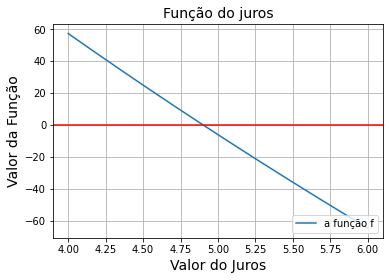

In [95]:
x=np.linspace(4,6,200) 
cm = 1/2.54  
fig, ax = plt.subplots(figsize=(15*cm, 10*cm))
ax.plot(x, f(x), label = 'a função f')    
plt.axhline(y=0, color='r' ) 
ax.set_xlabel('Valor do Juros',fontsize=14) 
ax.set_ylabel('Valor da Função',fontsize=14)
ax.set_title('Função do juros',fontsize=14)
ax.legend(loc='lower right')
ax.grid(True)

plt.show()

Como dito anteriormente, decidimos usar o método da bisseção por não precisar de derivada. Uma vez, que a nossa função possui um somatório e isso dificultaria o processo.

In [96]:
a = 4 #intervalo inicial
b = 5 #intervalo inicial

precisao = 0.1 #como não foi dado uma precisão, achamos que por se tratar de juros, 0.1 seria uma boa precisão

if (b-a) < precisao:
   jurosMes = a
else:
   k = 1 #interações
   M = f(a)
   while True:
      x = (a+b)/2
      print("Iteração:",k)
      print("Taxa de juros encontrada:",x) #taxa de juros
      print("Valor da f(juros):",f(x)) #f(taxa de juros)
      print("Pŕoximo valor:",(b - a)/2) 
      print("\n")

      if M * f(x) > 0:
         a = x
      else:
         b = x

      if (b - a) <= precisao:
         jurosMes = (a + b)/2
         break

      k = k + 1

print("Valor encontrado: {}% ao mês.".format(jurosMes)) #juros mensal


Iteração: 1
Taxa de juros encontrada: 4.5
Valor da f(juros): 24.94564478229222
Pŕoximo valor: 0.5


Iteração: 2
Taxa de juros encontrada: 4.75
Valor da f(juros): 9.265255776084814
Pŕoximo valor: 0.25


Iteração: 3
Taxa de juros encontrada: 4.875
Valor da f(juros): 1.5411438341568555
Pŕoximo valor: 0.125


Iteração: 4
Taxa de juros encontrada: 4.9375
Valor da f(juros): -2.2923030175736585
Pŕoximo valor: 0.0625


Valor encontrado: 4.90625% ao mês.


Agora definimos uma função para encontrar o juros anual a partir do juros mensal. Através da fórmula:

\begin{align}
  f(mensal) =(((\frac{mensal}{100}{+ 1})^{12})-1)*100
\end{align}


In [97]:
def jurosAno(juros):
  y = ((juros/100)+1)**12
  y = (y-1)*100
  return y

In [98]:
print("O valor encontrado para o juros anual é: {}%".format(jurosAno(jurosMes)))

O valor encontrado para o juros anual é: 77.67092162054368%


**Resposta:**

Taxa de juros Mensal: **4.9%**

Taxa de juros Anual: **77.6%**


# PROBLEMA 2


**PROBLEMA 2**

No problema 2, este empresário tem duas opções distintas para pagar uma maquina de custo **129,000.00** reais. Uma destas opções é a rota de empréstimo bancário com um juros de *2%* ao mês, enquanto a segunda rota seria parcelar com a loja em uma entrada e quatro parcelas todas diferentes dispostas da seguinte forma:

*entrada:* **27,000.00** reais

*parcela 1:* **24,000.00** reais

*parcela 2:* **30,000.00** reais

*parcela 3:* **32,000.00** reais

*parcela 4:* **22,000.00** reais

*total parcelado:* **135,000.00** *(6,000.00 a mais que o valor a vista)*

Com isso foi dado a tarefa de descobrir a taxa de juros paga no pagamento parcelado da loja e qual dessas opções é a melhor com relação a juros cobrados.
Para isso utilizamos novamente o método de Bisseção para encontrar o valor do juros da segunda rota, e a partir daí começar as comparações.

Mais uma vez começamos definindo as variaveis do problema.

In [99]:
valorVista2 = 129000
jurosEmprestimo2 = 0.02
valorEntrada2 = 27000
valorParcelas2 = [24000,30000,32000,22000] 
totalParcelado2 = 135000

Definimos a `def f2(juros)`, mas desta vez cada parcela precisa ser levada em consideração por elas serem diferentes.

In [100]:
Q = valorVista2 - valorEntrada2
def f2(juros):
  y = 0
  juros=juros/100
  for i in range (1,5):
    y = y + valorParcelas2[i-1]/(1+juros)**(i) #ao mesmo tempo que o loop é responsável por modificar o mês, ele também modifica o valorParcelas. Assim correndo pelo vetor.
  return y - Q

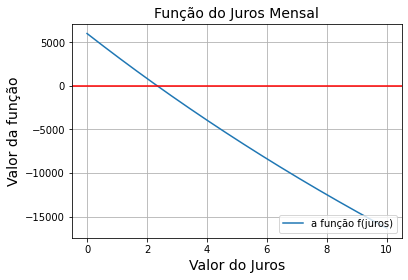

In [101]:
x=np.linspace(0,10,200)
cm = 1/2.54 
fig, ax = plt.subplots(figsize=(15*cm, 10*cm))
ax.plot(x, f2(x), label = 'a função f(juros)')
plt.axhline(y=0, color='r' )
ax.set_xlabel('Valor do Juros',fontsize=14)
ax.set_ylabel('Valor da função',fontsize=14)
ax.set_title('Função do Juros Mensal',fontsize=14) 
ax.legend(loc='lower right')
ax.grid(True)

plt.show()

Outra vez, reduzimos o intervalo do gráfico para melhorar a visualização do intervalo que será utilizado para achar o método da bisseção

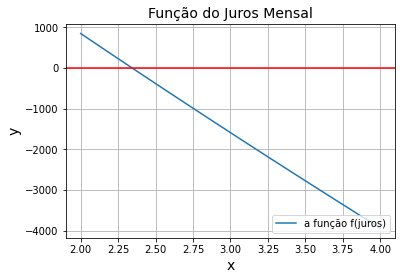

In [102]:
x=np.linspace(2,4,100)
cm = 1/2.54 
fig, ax = plt.subplots(figsize=(15*cm, 10*cm))
ax.plot(x, f2(x), label = 'a função f(juros)')
plt.axhline(y=0, color='r' )
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)
ax.set_title('Função do Juros Mensal',fontsize=14) 
ax.legend(loc='lower right')
ax.grid(True)

plt.show()

In [103]:
a = 2.25 #intervalo inicial
b = 2.5 #intervalo inicial

precisao = 0.01 #como não foi dado uma precisão, achamos que por se tratar de juros, 0.01 seria uma boa precisão

if (b-a) < precisao:
   jurosMes = a
else:
   k = 1 #interações
   M = f2(a)
   while True:
      x = (a+b)/2
      print("Iteração:",k)
      print("Taxa de juros encontrada:",x) #taxa de juros
      print("Valor da f(juros):",f2(x)) #f(taxa de juros)
      print("Pŕoximo valor:",(b - a)/2) 
      print("\n")

      if M * f2(x) > 0:
         a = x
      else:
         b = x

      if (b - a) <= precisao:
         jurosMes = (a + b)/2
         break

      k = k + 1

print("Valor encontrado: {}% ao mês.".format(jurosMes)) #juros mensal

Iteração: 1
Taxa de juros encontrada: 2.375
Valor da f(juros): -79.97588909140904
Pŕoximo valor: 0.125


Iteração: 2
Taxa de juros encontrada: 2.3125
Valor da f(juros): 73.00117169931764
Pŕoximo valor: 0.0625


Iteração: 3
Taxa de juros encontrada: 2.34375
Valor da f(juros): -3.5329517117352225
Pŕoximo valor: 0.03125


Iteração: 4
Taxa de juros encontrada: 2.328125
Valor da f(juros): 34.722702795872465
Pŕoximo valor: 0.015625


Iteração: 5
Taxa de juros encontrada: 2.3359375
Valor da f(juros): 15.592024861223763
Pŕoximo valor: 0.0078125


Valor encontrado: 2.33984375% ao mês.


**Resposta:**

Taxa de juros Mensal do parcelamento: **2.3%**

Taxa de juros mais vantajosa: empréstimo do Banco

# PROBLEMA 3


**PROBLEMA 3**

No problema 3, este investidor, em Setembro de 2018, tem a opção de comprar um título no Tesouro Nacional por **889.18** reais com a promessa de pagamentos semestrais, valor a seguir, sempre em janeiro e julho. Os pagamentos vão até janeiro de 2029 onde também receberia um pagamento final.

*parcela:* **48.81** reais

*pagamento final:* **1,000.00** reais

*total de parcelas:* **21** 

*total de meses:* **124**

*total parcelado + pagamento final:* **2,025.01** *(1,135.83 a mais que o valor investido)*

Com isso foi dado a tarefa de descobrir a taxa de juros mensal e anual embutida nesse título.

Mais uma vez, começamos inicializando as variáveis do problema

In [104]:
valorInvestimento3 = 889.18
valorParcelas3 = 48.81
pagamentoFinal3 = 1000
totalParcelas3 = 21
meses3 = 124
totalRecebimento3 = 2025.01

Dessa vez, a fórmula usada para a função é um pouco diferente.

In [105]:
def f3(juros):
  y = 0
  juros=juros/100
  y = valorParcelas3/(1+juros)**4
  for i in range (10,meses3,6):
    y = y + (valorParcelas3/(1+juros)**(i))
  y = y + (pagamentoFinal3/(1+juros)**(meses3))
  return y - valorInvestimento3

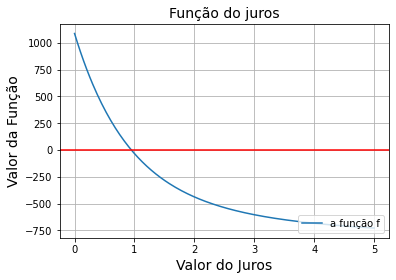

In [106]:
x=np.linspace(0,5,200) 
cm = 1/2.54  
fig, ax = plt.subplots(figsize=(15*cm, 10*cm))
ax.plot(x, f3(x), label = 'a função f')    
plt.axhline(y=0, color='r' ) #a linha do zero foi traçada para melhorar a visualização da raiz da função
ax.set_xlabel('Valor do Juros',fontsize=14) 
ax.set_ylabel('Valor da Função',fontsize=14)
ax.set_title('Função do juros',fontsize=14)
ax.legend(loc='lower right')
ax.grid(True)

plt.show()

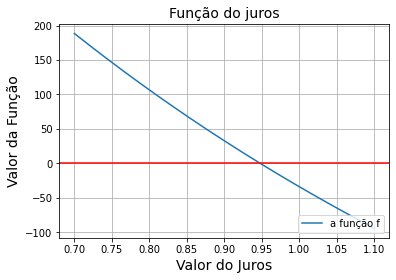

In [107]:
x=np.linspace(0.7,1.1,200) 
cm = 1/2.54  
fig, ax = plt.subplots(figsize=(15*cm, 10*cm))
ax.plot(x, f3(x), label = 'a função f')    
plt.axhline(y=0, color='r' ) #a linha do zero foi traçada para melhorar a visualização da raiz da função
ax.set_xlabel('Valor do Juros',fontsize=14) 
ax.set_ylabel('Valor da Função',fontsize=14)
ax.set_title('Função do juros',fontsize=14)
ax.legend(loc='lower right')
ax.grid(True)

plt.show()

In [108]:
a = 0.8 #intervalo inicial
b = 1.2 #intervalo inicial

precisao = 0.1 #como não foi dado uma precisão, achamos que por se tratar de juros, 0.1 seria uma boa precisão

if (b-a) < precisao:
   jurosMes = a
else:
   k = 1 #interações
   M = f3(a)
   while True:
      x = (a+b)/2
      print("Iteração:",k)
      print("Taxa de juros encontrada:",x) #taxa de juros
      print("Valor da f(juros):",f3(x)) #f(taxa de juros)
      print("Pŕoximo valor:",(b - a)/2) 
      print("\n")

      if M * f3(x) > 0:
         a = x
      else:
         b = x

      if (b - a) <= precisao:
         jurosMes = (a + b)/2
         break

      k = k + 1

print("Valor encontrado: {}% ao mês.".format(jurosMes)) #juros mensal


Iteração: 1
Taxa de juros encontrada: 1.0
Valor da f(juros): -33.88966233682379
Pŕoximo valor: 0.19999999999999996


Iteração: 2
Taxa de juros encontrada: 0.9
Valor da f(juros): 32.761770817841466
Pŕoximo valor: 0.09999999999999998


Valor encontrado: 0.95% ao mês.


In [109]:
def jurosAno(juros):
  y = ((juros/100)+1)**12
  y = (y-1)*100
  return y

In [110]:
print("O valor encontrado para o juros anual é: {}%".format(jurosAno(jurosMes)))

O valor encontrado para o juros anual é: 12.01492162741773%


**Resposta:**

Taxa de juros Mensal: **0.9%**

Taxa de juros Anual: **12.0%**

# PROBLEMA 4


**PROBLEMA 4**

No problema 4, outro investidor, um ano depois, tem a opção de comprar o mes título no Tesouro Nacional da questão anterior, por **1,207.52** reais. Assim como na última questão, beneficiando o comprador com pagamentos semestrais, valor a seguir, sempre em janeiro e julho. Os pagamentos vão até janeiro de 2029 onde também receberia um pagamento final.

*parcela:* **48.81** reais

*pagamento final:* **1,000.00** reais

*total de parcelas:* **19** 

*total de meses:* **112**

*total parcelado + pagamento final:* **1,927.39** *(719,87 a mais que o valor investido)*

Com isso foi dado a tarefa de descobrir a taxa de juros mensal e anual embutida nesse título.

Essa questão é muito parecida com a anterior, Problema 3, então o desenvolvimento ficou da mesma forma.

In [118]:
valorInvestimento4 = 1207.52
valorParcelas4 = 48.81
pagamentoFinal4 = 1000
totalParcelas4 = 19
meses4 = 112
totalRecebimento4 = 1,927.39

In [119]:
def f4(juros):
  y = 0
  juros=juros/100
  y = valorParcelas4/(1+juros)**4
  for i in range (10,meses4,6):
    y = y + (valorParcelas4/(1+juros)**(i))
  y = y + (pagamentoFinal4/(1+juros)**(meses4))
  return y - valorInvestimento4

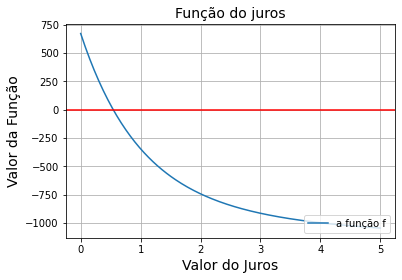

In [121]:
x=np.linspace(0,5,200) 
cm = 1/2.54  
fig, ax = plt.subplots(figsize=(15*cm, 10*cm))
ax.plot(x, f4(x), label = 'a função f')    
plt.axhline(y=0, color='r' ) #a linha do zero foi traçada para melhorar a visualização da raiz da função
ax.set_xlabel('Valor do Juros',fontsize=14) 
ax.set_ylabel('Valor da Função',fontsize=14)
ax.set_title('Função do juros',fontsize=14)
ax.legend(loc='lower right')
ax.grid(True)

plt.show()

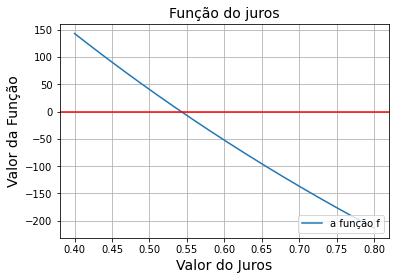

In [122]:
x=np.linspace(0.4,0.8,200) 
cm = 1/2.54  
fig, ax = plt.subplots(figsize=(15*cm, 10*cm))
ax.plot(x, f4(x), label = 'a função f')    
plt.axhline(y=0, color='r' ) #a linha do zero foi traçada para melhorar a visualização da raiz da função
ax.set_xlabel('Valor do Juros',fontsize=14) 
ax.set_ylabel('Valor da Função',fontsize=14)
ax.set_title('Função do juros',fontsize=14)
ax.legend(loc='lower right')
ax.grid(True)

plt.show()

In [125]:
a = 0.5 #intervalo inicial
b = 0.6 #intervalo inicial

precisao = 0.01 #como não foi dado uma precisão, achamos que por se tratar de juros, 0.1 seria uma boa precisão

if (b-a) < precisao:
   jurosMes = a
else:
   k = 1 #interações
   M = f3(a)
   while True:
      x = (a+b)/2
      print("Iteração:",k)
      print("Taxa de juros encontrada:",x) #taxa de juros
      print("Valor da f(juros):",f3(x)) #f(taxa de juros)
      print("Pŕoximo valor:",(b - a)/2) 
      print("\n")

      if M * f3(x) > 0:
         a = x
      else:
         b = x

      if (b - a) <= precisao:
         jurosMes = (a + b)/2
         break

      k = k + 1

print("Valor encontrado: {}% ao mês.".format(jurosMes)) #juros mensal


Iteração: 1
Taxa de juros encontrada: 0.55
Valor da f(juros): 328.6230014114982
Pŕoximo valor: 0.04999999999999999


Iteração: 2
Taxa de juros encontrada: 0.575
Valor da f(juros): 303.70297733820723
Pŕoximo valor: 0.024999999999999967


Iteração: 3
Taxa de juros encontrada: 0.5874999999999999
Valor da f(juros): 291.48818464993894
Pŕoximo valor: 0.012500000000000011


Iteração: 4
Taxa de juros encontrada: 0.59375
Valor da f(juros): 285.4410705527033
Pŕoximo valor: 0.006250000000000033


Valor encontrado: 0.596875% ao mês.


In [126]:
def jurosAno(juros):
  y = ((juros/100)+1)**12
  y = (y-1)*100
  return y

In [127]:
print("O valor encontrado para o juros anual é: {}%".format(jurosAno(jurosMes)))

O valor encontrado para o juros anual é: 7.402373011452057%


**Resposta:**

Taxa de juros Mensal: **0.5%**

Taxa de juros Anual: **7.4%**